In [5]:

import matplotlib.pyplot as plt
import pandas as pd
import duckdb
import ipywidgets as widgets
from IPython.display import display, clear_output

def query(query, db_path='../data/datalake/database.duckdb'):
    con = duckdb.connect(database=db_path, read_only=False)
    try:
        result = con.execute(query)
        df_result = result.fetch_df()
        return df_result
    except Exception as e:
        print(f"error: {e}")
    finally:
        con.close()

Dropdown(description='Station:', options=('AHO', 'AHV', 'AIN', 'ALH', 'ALV', 'APT', 'ARL', 'ARO', 'ARP', 'ASO'…

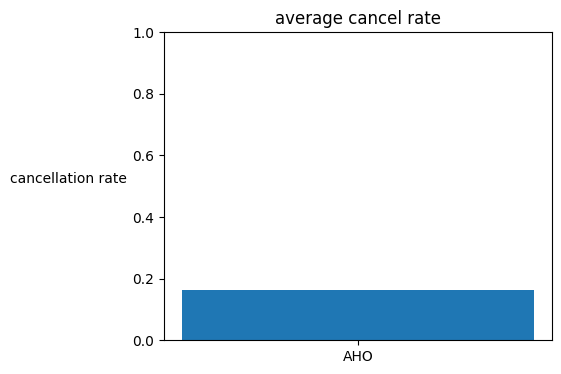

In [6]:
station_short_codes = query("SELECT DISTINCT stationShortCode FROM gold_layer", '../data/datalake/database.duckdb')['stationShortCode'].tolist()
station_short_codes.sort()

#dropdown list
station_dropdown = widgets.Dropdown(
    options=station_short_codes,
    description='Station:',
    disabled=False,
)

def cancelRates(station):
    average_rate = query(f"""
    SELECT AVG(percent_cancelled) as average_rate
    FROM gold_layer
    WHERE stationShortCode = '{station}'
    """, '../data/datalake/database.duckdb')['average_rate'].iloc[0]

    clear_output(wait=True)
    display(station_dropdown)
    plt.figure(figsize=(5, 4))
    plt.bar(station, average_rate)
    plt.title('average cancel rate')
    plt.ylabel('cancellation rate', rotation=0, ha='right')
    plt.ylim(0, 1)
    plt.show()

def changeStation(change):
    if change['type'] == 'change' and change['name'] == 'value':
        cancelRates(change['new'])

station_dropdown.observe(changeStation, names='value')
display(station_dropdown)
cancelRates(station_short_codes[0])

## Jos juna myöhästyy alle 5 minuuttia, sitä ei lasketa koodissa varsinaiseksi "myöhästymiseksi"

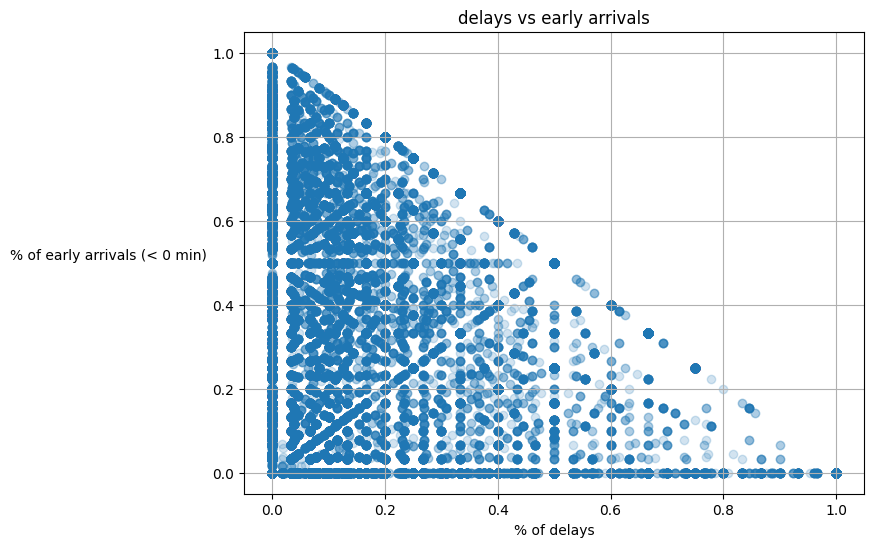

In [7]:

scatter_plot = query("""
SELECT percent_delays, percent_early_arrivals
FROM gold_layer
""")

plt.figure(figsize=(8, 6))
plt.scatter(scatter_plot['percent_delays'], scatter_plot['percent_early_arrivals'], alpha=0.2)
plt.title('delays vs early arrivals')
plt.xlabel('% of delays')
plt.ylabel('% of early arrivals (< 0 min)', rotation=0, ha='right')
plt.grid(True)
plt.show()


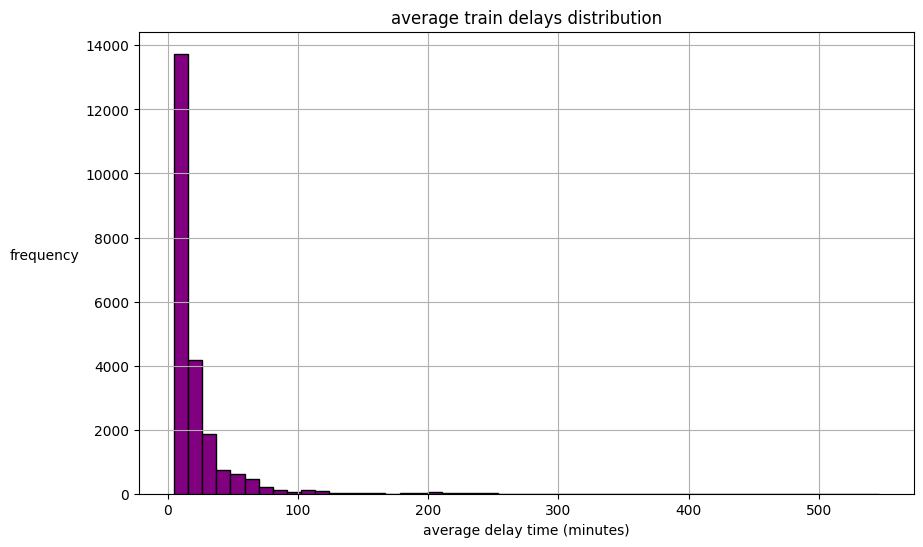

In [8]:
delay_data = query("""
SELECT avg_differenceInMinutes
FROM gold_layer
WHERE avg_differenceInMinutes > 5  -- considering only average delays greater than 5 minutes
""", '../data/datalake/database.duckdb')

plt.figure(figsize=(10, 6))
plt.hist(delay_data['avg_differenceInMinutes'], bins=50, color='purple', edgecolor='black')
plt.title('average train delays distribution')
plt.xlabel('average delay time (minutes)')
plt.ylabel('frequency', rotation=0, ha='right')
plt.grid(True)
plt.show()

